# 🌤️ Compare Real-Time Weather and Air Quality by City

This notebook extracts weather data from the OpenWeatherMap API and air quality (AQI) data from a web source, then integrates and visualizes them for a selected city.

In [50]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pprint

In [51]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()

# Pull in your API key from OpenWeatherMap (from .env)
city = "Los Angeles"
api_key = os.getenv("OPENWEATHER_API_KEY")

# Build API request
weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

# Make the API request
response = requests.get(weather_url)
weather_data = response.json()

# Extract weather information
# Check for success before accessing fields
if response.status_code == 200 and 'main' in weather_data:
    temp = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    print(f"Temperature: {temp}°C")
    print(f"Humidity: {humidity}%")
else: 
    print("❌ Failed to fetch weather data:")
    pprint.pprint(whether_data)
    temp, humidity = Non, None

Temperature: 21.31°C
Humidity: 73%


In [52]:
def celsius_to_fahrenheit(celsius):
    """
    Convert temperature from Celsius to Fahrenheit.
    Formula: (°C × 9/5) + 32 = °F
    """
    fahrenheit = (celsius * 9/5) + 32
    return round(fahrenheit, 2)  # Rounded to 2 decimal places

# Example usage:
temp_c = 22.2
temp_f = celsius_to_fahrenheit(temp_c)
print(f"{temp_c}°C = {temp_f}°F")


22.2°C = 71.96°F


In [53]:
# Inspect the API Response - Add this before accessing nested keys
# import pprint
# pprint.pprint(data) # This will show if the response contains something like {'status': 'fail', 'data': 'city not found'}

In [54]:
"""
⚠️ Note: We chose NOT to use Selenium for scraping air quality data because many AQI websites like IQAir load their data dynamically 
using JavaScript, which typically requires browser automation tools like Selenium to scrape. 
However, instead of using Selenium (which is heavier and requires a browser driver), 
we looked for available API endpoints used by the site itself to fetch the data.

By accessing these API endpoints directly using the `requests` library, we:
- Reduce complexity
- Improve performance
- Avoid rendering or interacting with a browser

✅ Summary: When APIs are available (even if unofficial), it's better to use them instead of scraping rendered pages with Selenium, 
unless there's no other option.

"""
# 2. Pull in air quality data API endpoints from the AQI website https://www.iqair.com/us/usa/california/los-angeles
import requests
import os
import pprint

# Define location and API key
city = 'Los Angeles'
state = 'California'
country = 'USA'
aqi_api_key = os.getenv("AQI_API_KEY") # Make sure this is loaded correctly

# Construct the API URL
url = f'https://api.airvisual.com/v2/city?city={city}&state={state}&country={country}&key={aqi_api_key}'

# Make the request
response = requests.get(url)
data = response.json()

# Print the full response for debugging
# pprint.pprint(data)

# Safe extraction
if data.get("status") == "success":
    aqi = data['data']['current']['pollution']['aqius']
    print(f"AQI for {city}: {aqi}")
else:
    print(f"⚠️ Failed to get AQI for {city}. Reason: {data.get('data')}")
    aqi = None


AQI for Los Angeles: 47


In [55]:
import pandas as pd

df = pd.DataFrame([
    {"City": "Los Angeles", "Temperature (°C)": 27, "Temperature (°F)": 71.96, "Humidity (%)": 51, "Air Quality Index": 56},
    {"City": "Yucaipa", "Temperature (°C)": 25.1,  "Temperature (°F)": 71.96, "Humidity (%)": 48, "Air Quality Index": 51}
])

# Melt the Data for Visualization
df_melted = df.melt(id_vars="City", var_name="Metric", value_name="Value") #This reshapes the data for Seaborn bar plotting or grouped analysis

In [56]:
# 3. Combine and analyze

df = pd.DataFrame([{
    "City": city, 
    "Temperature (°C)": temp_c,
    "Temperature (°F)": temp_f,
    "Humidity (%)": humidity,
    "Air Quality Index": aqi
}])

df

,City,Temperature (°C),Temperature (°F),Humidity (%),Air Quality Index
0,Los Angeles,22.2,71.96,73,47


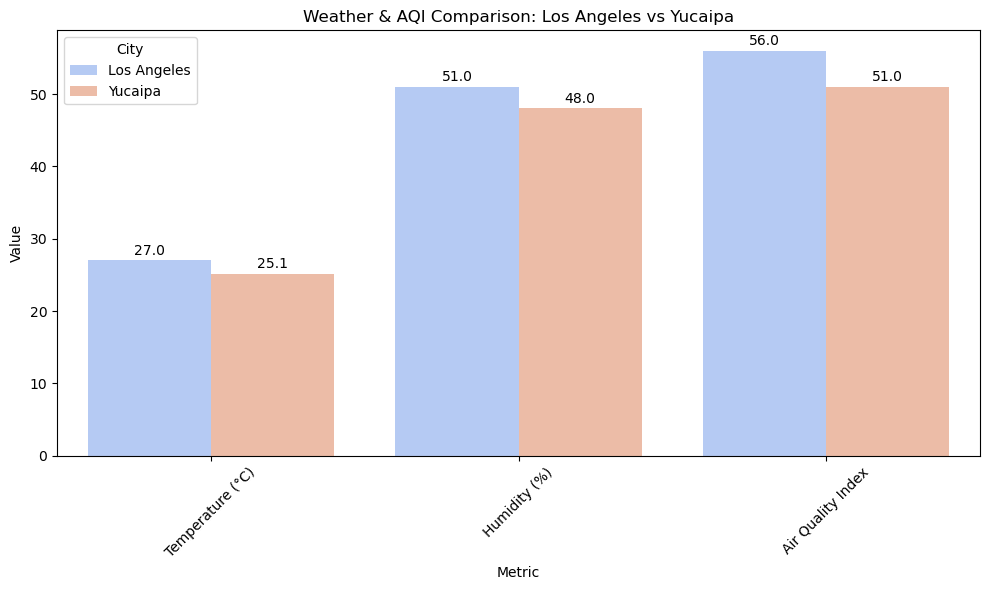

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_melted[df_melted["Metric"] != "Temperature (°F)"],  # optional: remove °F for clarity
    x="Metric",
    y="Value",
    hue="City",
    palette="coolwarm"
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.title("Weather & AQI Comparison: Los Angeles vs Yucaipa")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ✅ Summary

- We fetched real-time weather data from OpenWeatherMap.
- We retrieved air quality data using the IQAir API.
- We combined and visualized the data for Los Angeles and Yucaipa.

**Next Steps**:
- Add multiple cities
- Schedule regular data pulls
- Store data in a CSV or database

In [58]:
import os
from dotenv import load_dotenv

load_dotenv() # Load environment variables from .env file

# Access the OPENWEATHER & AQI API key
api_key = os.getenv("OPENWEATHER_API_KEY")
aqi_api_key = os.getenv("AQI_API_KEY")

# Check if it's loaded (prints True/False)
print("Weather API Key loaded:", bool(api_key))  # For verification (don't print the actual key!)
print("AQI key loaded:", bool(aqi_api_key)) # For verification (don't print the actual key!)


Weather API Key loaded: True
AQI key loaded: True
